<p>Group 11: </p>
Shreyas Daware(201751053)<br>
Deep Solanki<br>
Pranay Banawadi<br>
Nikhil Bhatia<br>

#  Topic:  Cancer Survival Detection using Habermans Dataset


1. Download Haberman Cancer Survival dataset from Kaggle. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Performing an analysis
* High level statistics of the dataset: number of points, number of   features, number of classes, data-points per class.
* Explaining our objective. 
* Performing Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Performing Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Prediction.

I have taken this dataset from (https://www.kaggle.com/gilsousa/habermans-survival-data-set).
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Now, let's Analyse this dataset


Note: I have used the the link of my google drive where i have uploaded the csv and linked it here which can be seen in line 1 of code cell 2(d1= pd.read_csv('/content/drive/My Drive/haberman.csv'), if you want to run it locally on your machine you can use the second line of code cell 2(which i have commented out). The code cells can be numbered differently for different users which generally happens with jupyter notebook.


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1= pd.read_csv('/content/drive/My Drive/haberman.csv')
# d1=pd.read_csv('./haberman.csv') # we can use this when running on local machine and both the ipynb file and csv file are in same folder

In [ ]:
names = ['age', 'year', 'nodes', 'status']cle
d1 = pd.read_csv('/content/drive/My Drive/haberman.csv', names=names)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

For analysing this dataset we should have a good domain knowledge.

In [4]:
d1.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


This shows the first five rows of the dataset

In [5]:
#number of rows and colmns:
print(d1.shape)

(306, 4)


shape shows the structure of dataset i.e this dataset contains 306 rows and 4 columns

In [6]:
print(d1.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


These 4 attributes of the dataset have 3 features and 1 class label.
The features are: 
1. age: The age of the patient
2. year: The year in which operation held
3. nodes: Number of lymph nodes


**Lymph nodes**: If you're diagnosed with lymph node-positive breast cancer, it means cancer has spread from the original tumor to the nearest lymph nodes, which are under your arm. When breast cancer spreads to lymph nodes it has essentially declared its intent to metastasize. These cancers, if left alone, would likely spread throughout the body.

The class label is: 'Status' which is a dependent feature: It is basically recovery status. It has 2 values only :(1,2). 1 means the person has survived 5 years after the operation and '2' means the person dies within 5 years of operation.

In [7]:
print(d1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


info tells us the information about the data. That is:
1. The number of rows is 306
2. There is no missing value in the dataset as there is 'notnull' mentioned for every column.
3. Datatype of each column is int

In [8]:
d1.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Describe: It calculates statistical data of dataset.It describes:
        1. There are 306 values(i.e. rows) in each column
        2. mean of all the elements of each column.
        3.Standard Deviation of all the elements of each column.
        4.25 Percentile, 50th percentile and 75th percentile of data given in each column.
        5. maximum and minimum value of each column.
        
The minimum age is 30 and maximum age is 83. This implies that the dataset contains data of people who are between 30 and 83 years of age.
This dataset contains data of patients from year 1958 to 1969.
The lymph nodes are present between 0 to 52 in patients.
And there are only two values of operation status: 1 and 2

In [9]:
d1['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

The value_counts() function is used to get a Series containing counts of unique values.

here, as there are only two values i.e. 1 and 2 in status column we can count number of '1's and number of'2's present in the dataset>

This shows that there are 255 patients who survived 5 years or more and 81 patients to died within 5 years  

In [10]:
d1['status']= d1['status'].replace([1,2],['yes','no'])

As we have seen before that status== 1 this means the patient has survived for 5 or more years after the operation.
And when status== 2 this means patient has died within 5 years of operation.
so we can consider '1' as 'yes' and '2' as 'no'. that means the operation is successfull or not.


In [11]:
d1['status'].value_counts()

yes    225
no      81
Name: status, dtype: int64

Now we can see that operation is successful in 225 patients and not successful for 81 patients

In [12]:
print(d1['status'].value_counts(normalize= True))

yes    0.735294
no     0.264706
Name: status, dtype: float64


This shows the data in normalized form. That is 73% of patients lived more than 5 years after the operation and 26.4% of patients died within 5 years of operation.
Since there is not much difference in the ratio of both the data. We can say that data is balenced dataset.

# 2D Scatter Plot

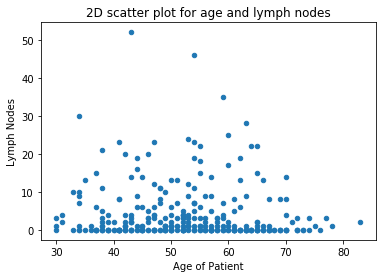

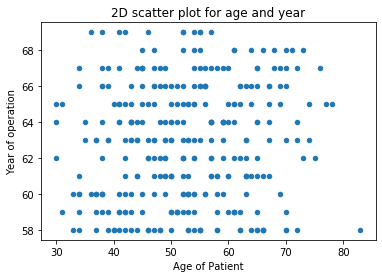

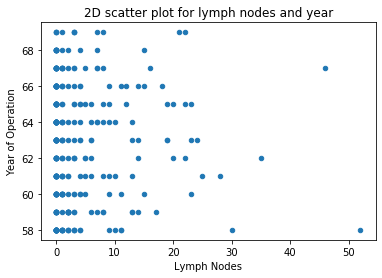

In [13]:
d1.plot(kind= 'scatter', x= 'age', y= 'nodes');
plt.xlabel('Age of Patient')
plt.ylabel('Lymph Nodes')
plt.title('2D scatter plot for age and lymph nodes')
plt.show()
d1.plot(kind= 'scatter', x= 'age', y= 'year');
plt.xlabel('Age of Patient')
plt.ylabel('Year of operation')
plt.title('2D scatter plot for age and year')
plt.show()
d1.plot(kind= 'scatter', x= 'nodes', y= 'year');
plt.xlabel('Lymph Nodes')
plt.ylabel('Year of Operation')
plt.title('2D scatter plot for lymph nodes and year')
plt.show()

In this scatter plot we have plotted 'age' and 'nodes'; 'nodes' and 'year' ; and 'age' and 'year'.
This shows the overlapped data and we are not able to predict anything from this plot. so we;ll differentiate them using scatter dots of different colors.

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


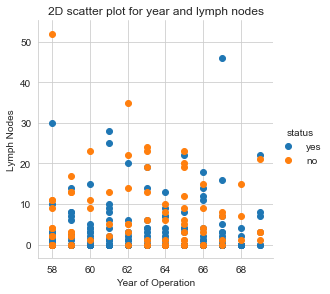

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


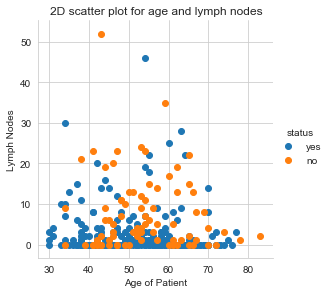

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


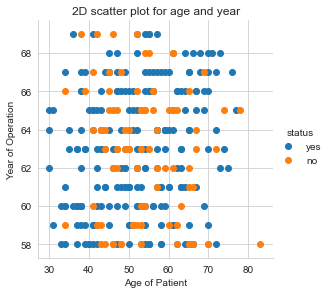

In [14]:
sns.set_style('whitegrid');
sns.FacetGrid(d1, hue= 'status', size= 4).map(plt.scatter, 'year', 'nodes').add_legend();
plt.xlabel('Year of Operation')
plt.ylabel('Lymph Nodes')
plt.title('2D scatter plot for year and lymph nodes')
plt.show();

sns.set_style('whitegrid');
sns.FacetGrid(d1, hue= 'status', size= 4).map(plt.scatter, 'age', 'nodes').add_legend();
plt.xlabel('Age of Patient')
plt.ylabel('Lymph Nodes')
plt.title('2D scatter plot for age and lymph nodes')
plt.show();

sns.set_style('whitegrid');
sns.FacetGrid(d1, hue= 'status', size= 4).map(plt.scatter, 'age', 'year').add_legend();
plt.xlabel('Age of Patient')
plt.ylabel('Year of Operation')
plt.title('2D scatter plot for age and year')
plt.show();

1. In the plot between nodes and age we are able to see that when nodes==0  there are more 'yes' scatter points and very few 'no' scatter points.
2. between 50-60 years of age the people have chances to survive more than 5 years if they have some lymph nodes.

But these observations are not always true.


But here we cannot observe many things as all the scatter points are overlapping so we wll plot a pairplot .

# **Pair Plots**

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


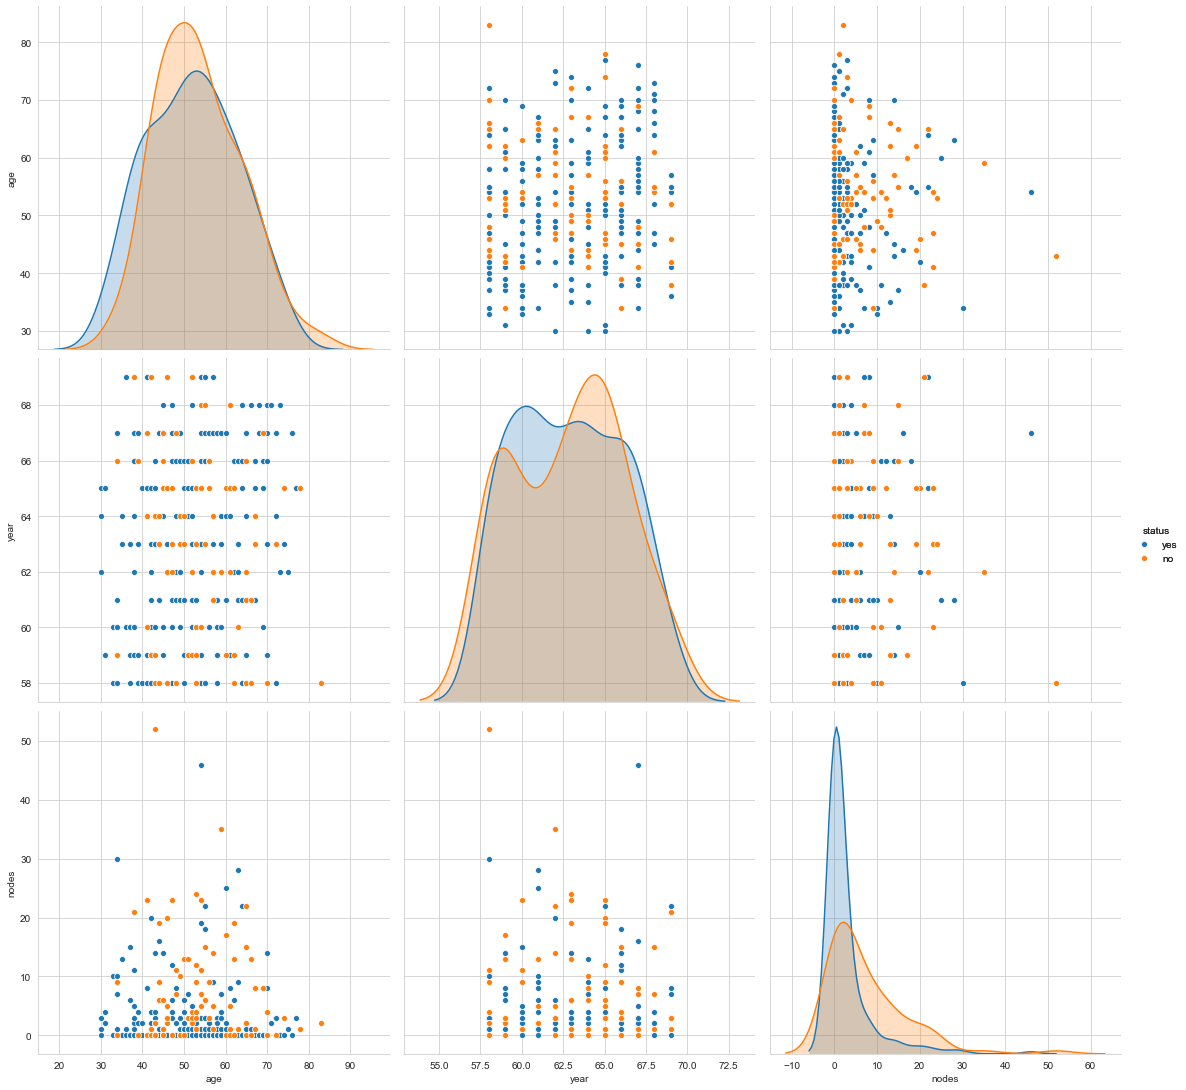

In [15]:
sns.set_style=('whitegrid');
sns.pairplot(d1, hue= 'status', size= 5).add_legend();

plt.show()

Here, we can observe that:

1.The patients having less lymph nodes survived more in comparison to others.

2.As there are mostly overlapping points in all these plots. so we cannot observe much from this.

# Histograms, PDF and CDF:

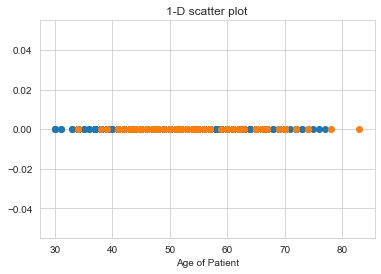

In [16]:
#1D scatter plot:
data1= d1.loc[d1['status']== 'yes'];
data2= d1.loc[d1['status']=='no'];

plt.plot(data1['age'], np.zeros_like(data1['age']),'o')

plt.plot(data2['age'], np.zeros_like(data2['age']),'o')
plt.xlabel('Age of Patient')
plt.title('1-D scatter plot')

plt.show()

Very hard to sense in this as points are overlapping a lot.

Better way to visualize 1D scatter plot is histogram.

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


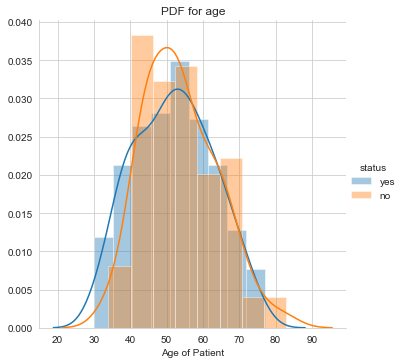

In [17]:
sns.FacetGrid(d1, hue= 'status', size= 5).map(sns.distplot, 'age').add_legend();
plt.xlabel('Age of Patient')

plt.title('PDF for age')
plt.show()

In [18]:
d1['status'].value_counts()


yes    225
no      81
Name: status, dtype: int64

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


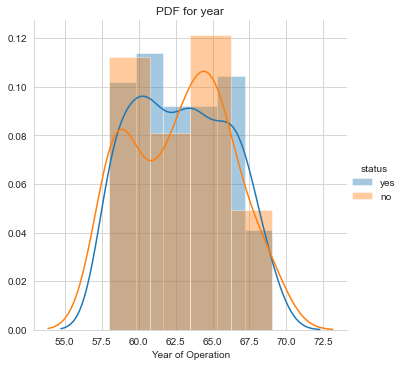

In [19]:
sns.FacetGrid(d1, hue= 'status', size= 5).map(sns.distplot, 'year').add_legend();
plt.xlabel('Year of Operation')
plt.title('PDF for year')
plt.show()

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


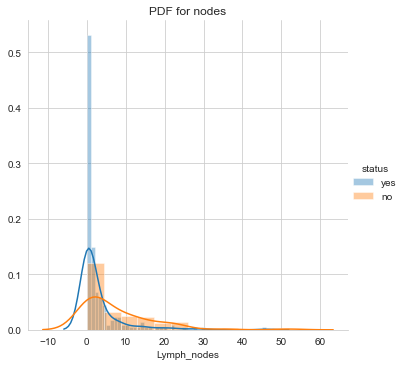

In [20]:
sns.FacetGrid(d1, hue= 'status', size= 5).map(sns.distplot, 'nodes').add_legend();
plt.xlabel('Lymph_nodes')
plt.title('PDF for nodes')
plt.show()


**Observation**:
1. As in plot 3 we are able to see that people have more age if less nodes but it can not b said clearly as it is hard to classify as the points are overlapping a lot.

# CDF

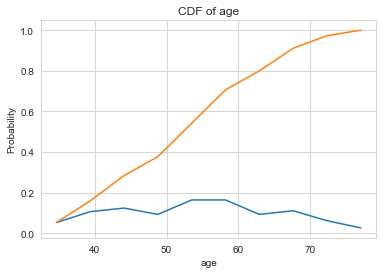

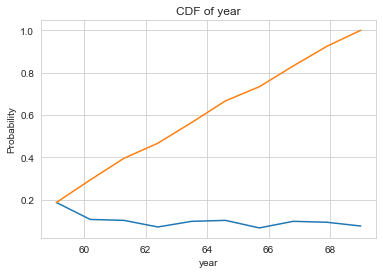

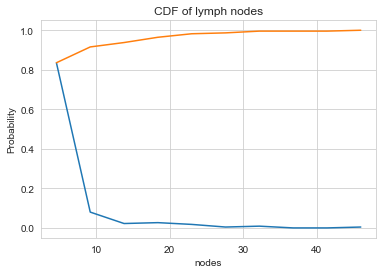

In [21]:
#CDF:
#For age
counts, bin_edges= np.histogram(data1['age'], bins= 10, density= True)
pdf= counts/(sum(counts))
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.ylabel('Probability')
plt.title("CDF of age")
plt.show()

#For year
counts, bin_edges= np.histogram(data1['year'], bins= 10, density= True)
pdf= counts/(sum(counts))
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('Probability')
plt.title("CDF of year")
plt.show()

#For nodes
counts, bin_edges= np.histogram(data1['nodes'], bins= 10, density= True)
pdf= counts/(sum(counts))
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('Probability')
plt.title("CDF of lymph nodes")
plt.show()


# Mean, Variance and std-dev

In [22]:
print('mean')
print('Mean of age is:',np.mean(data1['age']))
print('Mean of year is:',np.mean(data1['year']))
print('Mean of node is:',np.mean(data1['nodes']))

print('std-dev:')
print('standard Deviation of age is:',np.std(data1['age']))
print('standard Deviation of year is:',np.std(data1['year']))
print('standard Deviation of nodes is:',np.std(data1['nodes']))


mean
Mean of age is: 52.01777777777778
Mean of year is: 62.86222222222222
Mean of node is: 2.7911111111111113
std-dev:
standard Deviation of age is: 10.98765547510051
standard Deviation of year is: 3.2157452144021956
standard Deviation of nodes is: 5.857258449412131


# Median, Percentile, Quantile, IQR, MAD

In [26]:
print('Medians')
print('Median of age is:',np.median(data1['age']))
print('Median of year is:',np.median(data1['year']))
print('Median of nodes is:',np.median(data1['nodes']))

print('Quantiles')
print('Quantiles of age is:',np.percentile(data1['age'],np.arange(0,100,25)))
print('Quantiles of year is:',np.percentile(data1['year'],np.arange(0,100,25)))
print('Quantiles of nodes is:',np.percentile(data1['nodes'],np.arange(0,100,25)))

print('90th Percentiles')

print('90th Percentiles of age is:',np.percentile(data1['age'],90))
print('90th Percentiles of year is:',np.percentile(data1['year'],90))
print('90th Percentiles of nodes is:',np.percentile(data1['nodes'],90))

from statsmodels import robust
print('Median Absolute Deviation')
print('Median Absolute Deviation of age is:',robust.mad(data1['age']))
print('Median Absolute Deviation of year is:',robust.mad(data1['year']))
print('Median Absolute Deviation of nodes is:',robust.mad(data1['nodes']))

Medians
Median of age is: 52.0
Median of year is: 63.0
Median of nodes is: 0.0
Quantiles
Quantiles of age is: [30. 43. 52. 60.]
Quantiles of year is: [58. 60. 63. 66.]
Quantiles of nodes is: [0. 0. 0. 3.]
90th Percentiles
90th Percentiles of age is: 67.0
90th Percentiles of year is: 67.0
90th Percentiles of nodes is: 8.0
Median Absolute Deviation
Median Absolute Deviation of age is: 13.343419966550417
Median Absolute Deviation of year is: 4.447806655516806
Median Absolute Deviation of nodes is: 0.0


# **Box Plots**

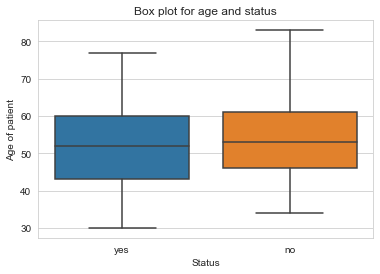

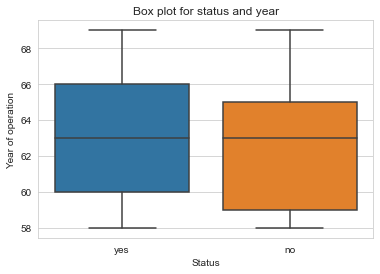

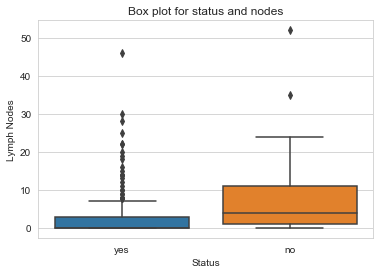

In [27]:
sns.boxplot(x= 'status', y= 'age', data= d1)
plt.xlabel('Status')
plt.ylabel('Age of patient')
plt.title('Box plot for age and status')
plt.show()

sns.boxplot(x= 'status', y= 'year', data= d1)
plt.xlabel('Status')
plt.ylabel('Year of operation')
plt.title('Box plot for status and year')
plt.show()

sns.boxplot(x= 'status', y= 'nodes', data= d1)
plt.xlabel('Status')
plt.ylabel('Lymph Nodes')
plt.title('Box plot for status and nodes')

plt.show()



# **Violin Plots**

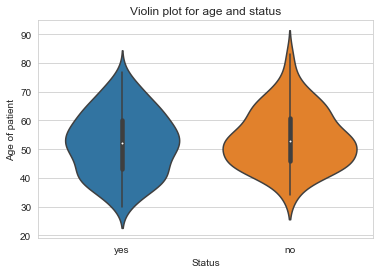

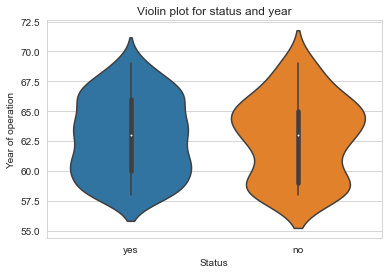

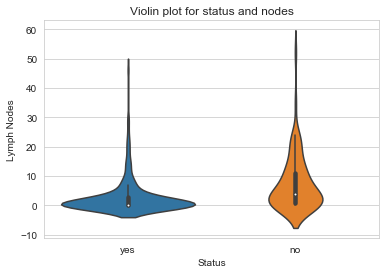

In [28]:
sns.violinplot(x= 'status', y= 'age',data= d1, size= 8)
plt.xlabel('Status')
plt.ylabel('Age of patient')
plt.title('Violin plot for age and status')
plt.show()

sns.violinplot(x= 'status', y= 'year', data= d1, size= 8)
plt.xlabel('Status')
plt.ylabel('Year of operation')
plt.title('Violin plot for status and year')
plt.show()

sns.violinplot(x= 'status', y= 'nodes', data= d1, size= 8)

plt.xlabel('Status')
plt.ylabel('Lymph Nodes')
plt.title('Violin plot for status and nodes')


plt.show()

From boxplot and violin plot we observed that:

    1.patients with less lymph nodes have higher chances of surviving.
    
    2.Before 1960 and after 1966 there are higher chances of surviving.
    
    3.patients betweem age 45 to 55 have more chances of surviving.

# Observation:

1. In the given dataset, there is high chances of survival of patients age between 45-55.
2. There is a higher chance of survival people having less number of lymph nodes.
3. Also we are able to see that before 1959 and after 1966 there is higher rate of survival.



# **Prediction**

In [29]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [30]:
try:
    d1["status"] = LabelEncoder().fit(["no","yes"]).transform(d1["status"])
except:
    pass
try:
    d1["status"] = LabelEncoder().fit([2,1]).transform(d1["status"])
except:
    pass
X = np.array(d1[["age","year","nodes"]])
Y = np.array(d1[["status"]])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [31]:
#Using Neural Nets
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log = {}):
        if log.get('accuracy') >= 0.70:
            print("70% accurate")
            self.model.stop_training = True
            
callback = myCallback()

model = tf.keras.models.Sequential(layers = [
    tf.keras.layers.Dense(units = 3, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 2, activation = tf.nn.softmax)
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train,Y_train, epochs = 30, callbacks = [callback])

Epoch 1/30
9/9 [==============================] - 0s 8ms/step - loss: 34.4243 - accuracy: 0.2618
Epoch 2/30
9/9 [==============================] - 0s 1ms/step - loss: 32.9514 - accuracy: 0.2618
Epoch 3/30
9/9 [==============================] - 0s 1000us/step - loss: 31.5174 - accuracy: 0.2618
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 30.1284 - accuracy: 0.2618
Epoch 5/30
9/9 [==============================] - 0s 1ms/step - loss: 28.7772 - accuracy: 0.2618
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 27.4597 - accuracy: 0.2618
Epoch 7/30
9/9 [==============================] - 0s 1000us/step - loss: 26.1684 - accuracy: 0.2618
Epoch 8/30
9/9 [==============================] - 0s 1000us/step - loss: 24.9316 - accuracy: 0.2618
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 23.7285 - accuracy: 0.2618
Epoch 10/30
9/9 [==============================] - 0s 1000us/step - loss: 22.5887 - accuracy: 0.2618
Epoch 11/30
9/9 [

In [32]:
#testing Neural network
p = model.predict(X_test)
Y_predict = [] 
for i in p:
    Y_predict.append(0) if i[0]>i[1] else Y_predict.append(1)
Y_predict = np.array(Y_predict)
accuracy_NN = 1 - sum(np.power((Y_test.reshape(-1,1)- Y_predict.reshape(-1,1)),2))/len(Y)
accuracy_NN

array([0.92810458])

In [33]:
#prediction using NN
prediction_NN=model.predict(np.array([[20,20,20],[30,10,20]]))
for i in prediction_NN:
    print("no") if i[0]>i[1] else print("yes")
prediction_NN



yes
no


array([[0.39829794, 0.60170203],
       [0.5542469 , 0.44575304]], dtype=float32)

In [34]:
#Using Logistic Reg
model_log = linear_model.LogisticRegression()
model_log.fit(X_train,Y_train)
Y_predict = model_log.predict(X_test)
# Testing LR
accuracy_LR = 1 - sum(np.power((Y_test.reshape(-1,1)- Y_predict.reshape(-1,1)),2))/len(Y)
accuracy_LR

C:\Users\bhush\.conda\envs\mynewenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.96405229])

In [35]:
model_log.predict(np.array([[20,40,20],[30,68,2],[1,2,3]]).reshape(-1,3))

array([0, 1, 1])